# Polynomial Linear Regression Demonstration

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv

In [4]:
# Import the dataset
#dataset = pd.read_csv('wine.data',header=None,usecols=[0,1,2,3,4,5])
#dataset.columns=['']
#dataset = pd.read_csv('SampleData2.csv')
dataset = pd.read_csv('Sample_1D_data.csv')

In [5]:
dataset

,x,y
0,0.86,2.49
1,0.09,0.83
2,-0.85,-0.25
3,0.87,3.10
4,-0.44,0.87
5,0.43,0.02
6,-1.10,-0.12
7,0.40,1.81
8,-0.96,-0.83
9,0.17,0.43


In [695]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
X = dataset.iloc[:,0].values

In [8]:
X

array([ 0.86,  0.09, -0.85,  0.87, -0.44,  0.43, -1.1 ,  0.4 , -0.96,  0.17])

In [9]:
y = dataset.iloc[:,1].values

In [698]:
type(X)

numpy.ndarray

In [10]:
y

array([ 2.49,  0.83, -0.25,  3.1 ,  0.87,  0.02, -0.12,  1.81, -0.83,  0.43])

Text(0,0.5,'y')

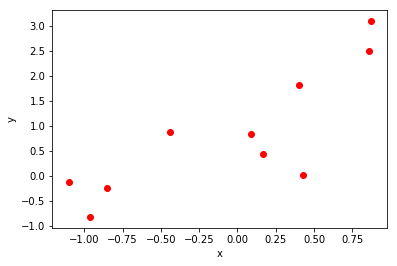

In [699]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
#plt.ylim((-2,4))

In [11]:
def solveW(X,y):
    # Add a x0 = 1 (column)
    X = np.vstack((np.ones(X.shape),X)).T
    
    # Computing the weight vector w
    w = inv((X.T.dot(X))).dot(X.T.dot(y))
    return w

In [701]:
w = solveW(X,y)
w

array([ 0.90987777,  1.41278805])

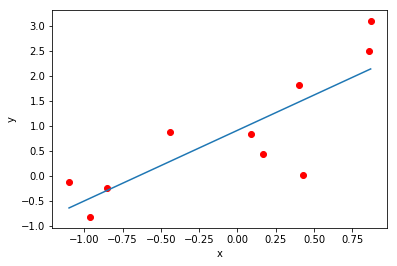

In [702]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = w[0] + xVals*w[1]
plt.plot(xVals,yVals)

In [703]:
def predict_y(x,w):
    x = [1,x]
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]*w[i]
    return sum 

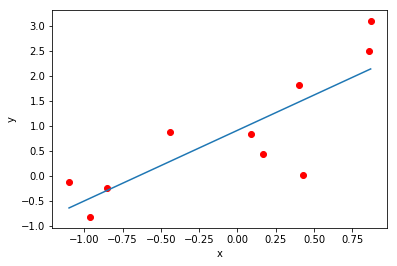

In [704]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w)
plt.plot(xVals,yVals)

# Now let's do polynomial linear regression ( Order 2 fit)

In [12]:
def solveW(X,y,order=1):
    # Add a x0 = 1 (column)
    X = np.vstack((np.ones(X.shape),X)).T
    if order>=2:
        for i in range(2,order+1):
            X = np.vstack((X.T,X[:,1]**i)).T
    
    # Computing the weight vector w
    w = inv((X.T.dot(X))).dot(X.T.dot(y))
    return w

In [13]:
# Computing the weight vector w
w = solveW(X,y,order=2)

In [14]:
w

array([ 0.48568053,  1.63137445,  0.8846396 ])

(-2, 4)

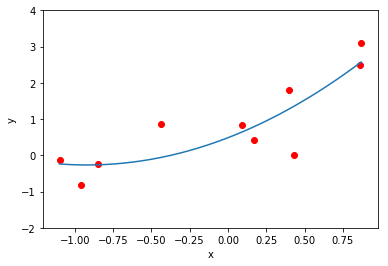

In [16]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = w[0] + xVals*w[1] + xVals**2*w[2]
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [709]:
def predict_y(x,w,order=1):    
    x = [1, x]
    for i in range(2,order+1):
        x.append(x[1]**i)
    
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]*w[i]
    return sum 

(-2, 4)

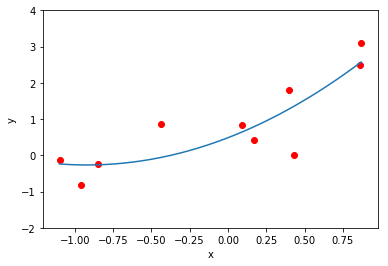

In [710]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=2)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

# Now let's do polynomial linear regression ( Order 3 fit)

In [18]:
# Computing the weight vector w
w = solveW(X,y,order=3)

In [712]:
w

array([ 0.54361791,  0.42404982,  1.10109018,  1.55335792])

(-2, 4)

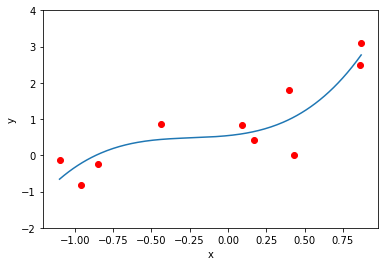

In [713]:
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=3)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

# Order 4 fit

(-2, 4)

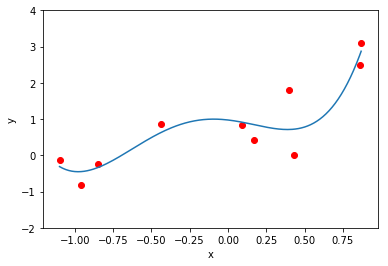

In [714]:
# Computing the weight vector w
w = solveW(X,y,order=4)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=4)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [715]:
w

array([ 0.97488359, -0.48560762, -2.21036395,  3.10196803,  3.4035302 ])

# Order 5 fit

(-2, 4)

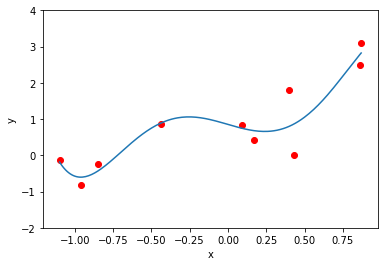

In [716]:
# Computing the weight vector w
w = solveW(X,y,order=5)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=5)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [717]:
w

array([ 0.85254008, -1.23062211,  0.08686328,  7.11092725,  0.43780727,
       -3.92802166])

# Order 6 fit

(-2, 4)

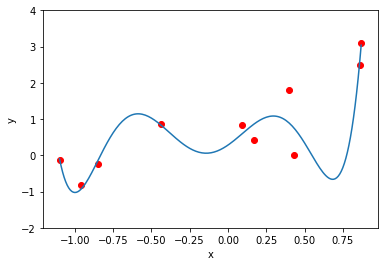

In [718]:
# Computing the weight vector w
w = solveW(X,y,order=6)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=6)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [719]:
w

array([  0.28203455,   2.91880598,   7.1567007 , -20.86878711,
       -29.37473462,  25.84215123,  28.80247505])

# Order 7 fit

(-2, 4)

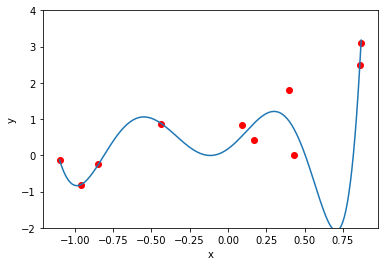

In [720]:
# Computing the weight vector w
w = solveW(X,y,order=7)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=7)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [721]:
w

array([  0.17808331,   3.05818574,  11.17521632, -19.94408663,
       -51.84404938,  10.90740318,  51.77835173,  18.09555145])

# Order 8 fit

(-2, 4)

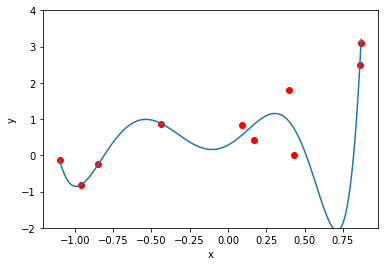

In [722]:
# Computing the weight vector w
w = solveW(X,y,order=8)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=8)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [723]:
w

array([  0.28118769,   2.28319947,   9.85280571, -13.18448139,
       -45.30600634,  -4.54308694,  38.59290199,  28.50493311,   8.78493388])

# Order 20 fit

(-2, 4)

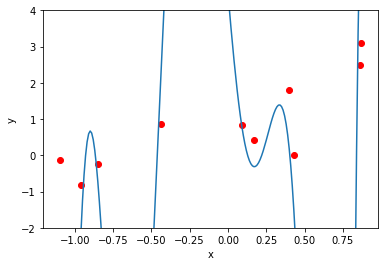

In [724]:
# Computing the weight vector w
w = solveW(X,y,order=20)
%matplotlib inline
plt.scatter(X, y, color = 'red')
plt.xlabel('x')
plt.ylabel('y')

# Draw the regression line
xVals = np.arange(min(X),max(X),0.01)
yVals = predict_y(xVals,w,order=20)
plt.plot(xVals,yVals)
plt.ylim((-2,4))

In [725]:
w

array([  4.48808289e+00,  -5.07541504e+01,   7.26684570e+01,
         4.90617188e+02,  -5.77324219e+02,  -1.48702344e+03,
         2.25250000e+02,   6.16437500e+02,   1.04906250e+03,
         1.64670312e+03,  -5.42765625e+02,  -4.84392578e+02,
         2.29000000e+02,   1.36250000e+01,   5.99085938e+02,
        -1.26275391e+03,  -1.88376562e+03,   2.27136719e+02,
         4.70984375e+02,   1.32617188e+00,   5.71328125e+01])